In [1]:
import numpy as np
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# using tuple unpacking to load dataset into respective arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

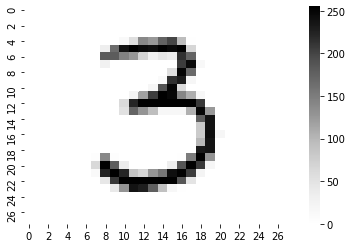

In [5]:
sns.heatmap(x_train[50], cmap='Greys')
plt.show()

In [6]:
y_train[50]

3

In [7]:
from collections import Counter

In [8]:
Counter(y_train)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [9]:
# array contains numbers 0-9

In [10]:
def reshape(mat_x):
    shape_x = mat_x.shape
    return mat_x.reshape(shape_x[0],shape_x[1]*shape_x[2])

In [11]:
# reshaping x_train to change its shape from (60000,28,28) into (60000,784)
x_train = reshape(x_train)
print(x_train.shape)
# # reshaping x_train to change its shape from (10000,28,28) into (10000,784)
x_test = reshape(x_test)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
# feature scaling of arrays for more accurate training and testing of ANN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
ann = keras.models.Sequential()
ann.add(keras.layers.Dense(units=64, activation='relu')) #adding layers
ann.add(keras.layers.Dense(units=64, activation='relu'))
ann.add(keras.layers.Dense(units=10, activation='softmax')) #last layer (output)

In [14]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
ann.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2441 - accuracy: 0.9280
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1087 - accuracy: 0.9661
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9760
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0624 - accuracy: 0.9811
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0490 - accuracy: 0.9842
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0396 - accuracy: 0.9868
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9885
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0325 - accuracy: 0.9893
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0266 - accuracy: 0.9914
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.025

In [16]:
pred_y = ann.predict(x_test)
pred_y = [np.argmax(pred) for pred in pred_y] # getting index of maximum value in each list

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



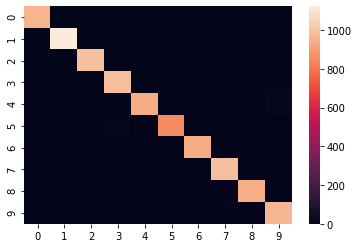

In [19]:
# confusion matrix visualisation
sns.heatmap(confusion_matrix(y_test,pred_y))
plt.show()

# Testing

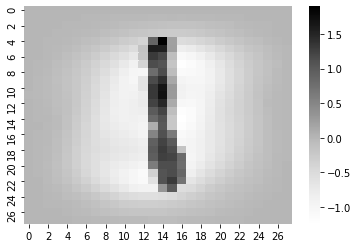

1


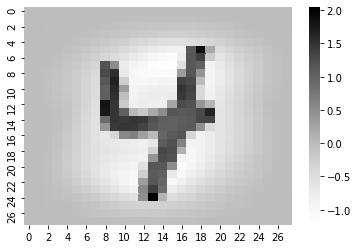

4


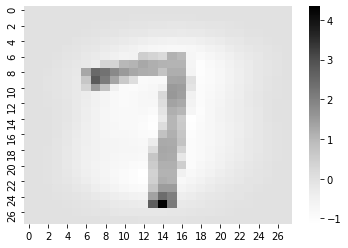

7


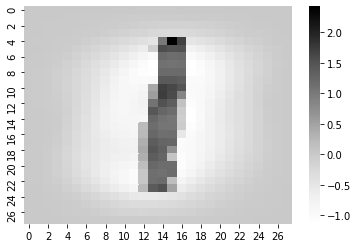

1


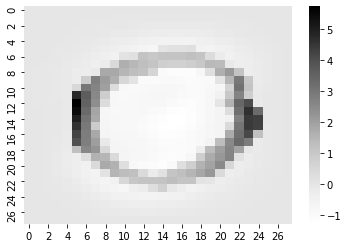

0


In [20]:
for i in range(5):
    index = np.random.randint(10000)
    sns.heatmap(x_test[index].reshape(28,28), cmap='Greys')
    plt.show()
    print(pred_y[index])

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,pred_y)

0.9719

In [23]:
count_y = Counter(y_test)
count_pred_y = Counter(pred_y)
error = {}
for key,value in count_y.items():
    error[key] = abs(value - count_pred_y[key])

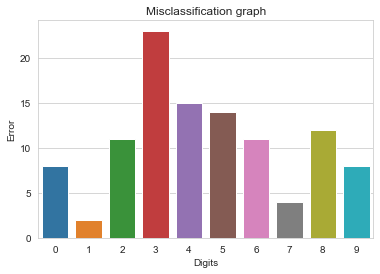

In [24]:
sns.set_style('whitegrid')
sns.barplot(x=list(error.keys()), y=list(error.values()))
plt.xlabel('Digits')
plt.ylabel('Error')
plt.title('Misclassification graph')
plt.show()